In [185]:
import requests

# OCR api를 호출하는 함수
def OCR_api(file_path) : 
    api_url = "http://118.222.179.32:30000/ocr/";
    headers = {"secret": "Boostcamp0000"};
    file_dict = {"file": open(file_path, "rb")};
    response = requests.post(api_url, headers=headers, files=file_dict);
    ocr_output = response.json();
    
    return ocr_output

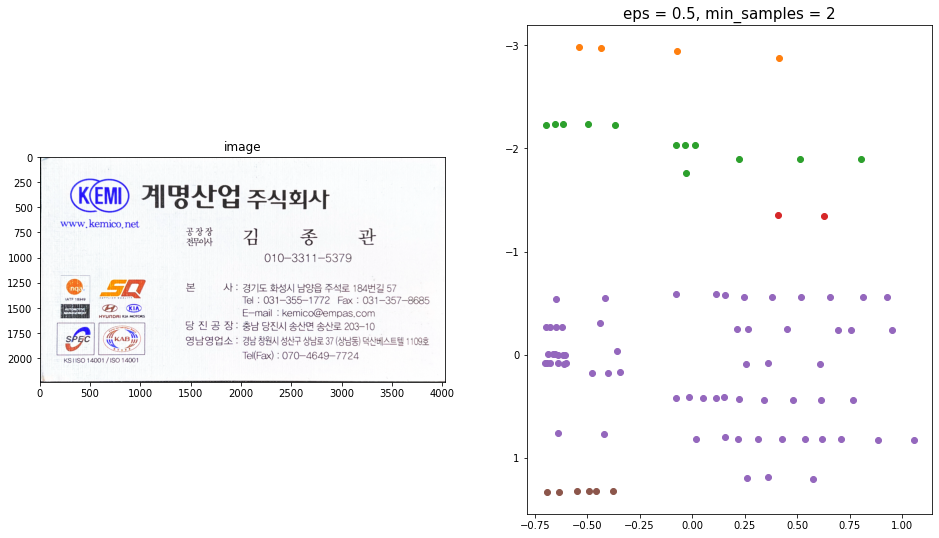

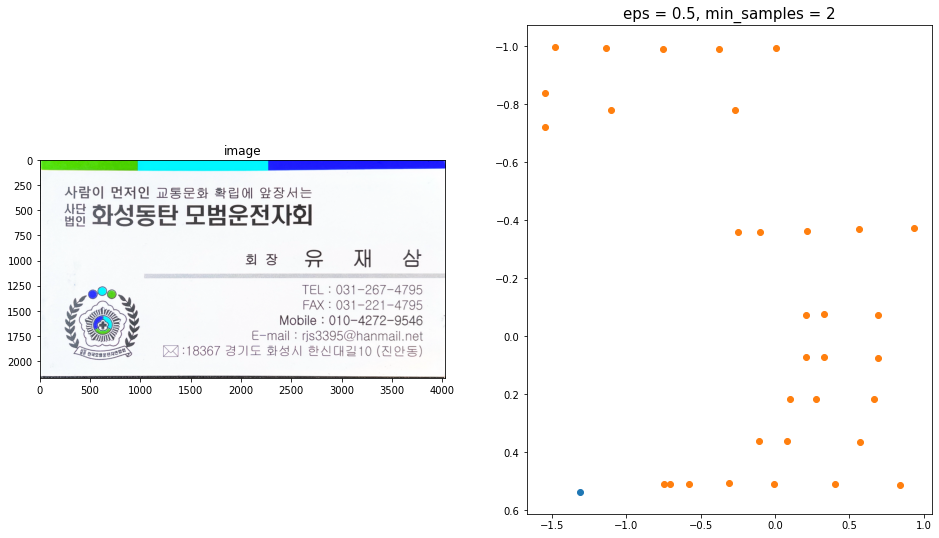

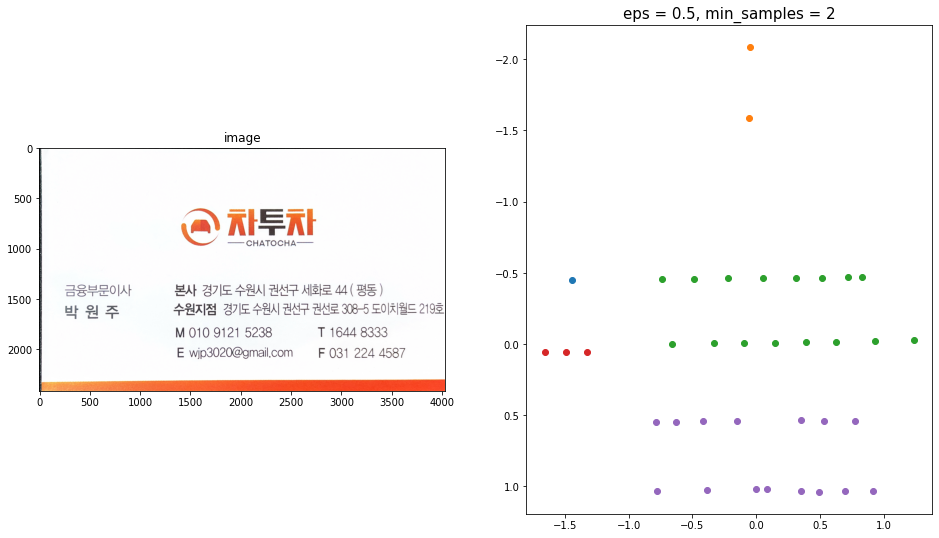

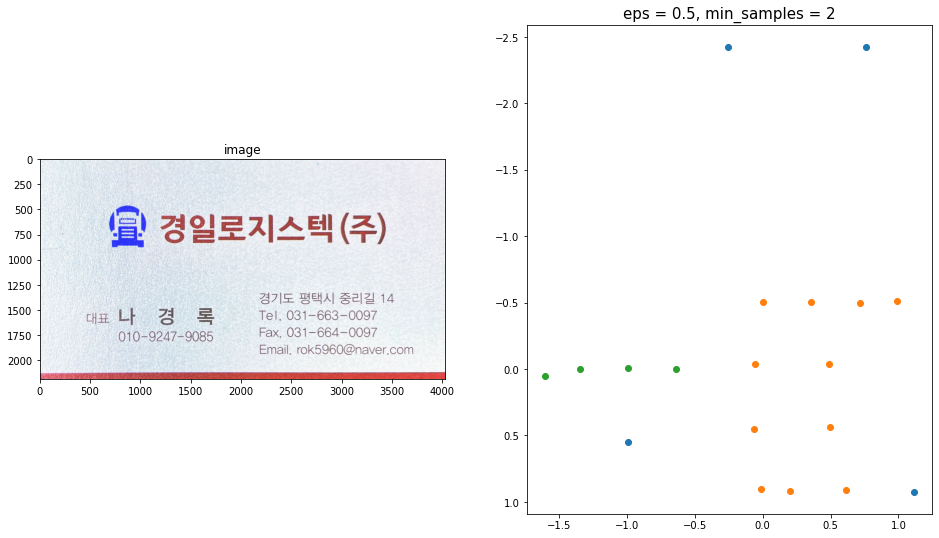

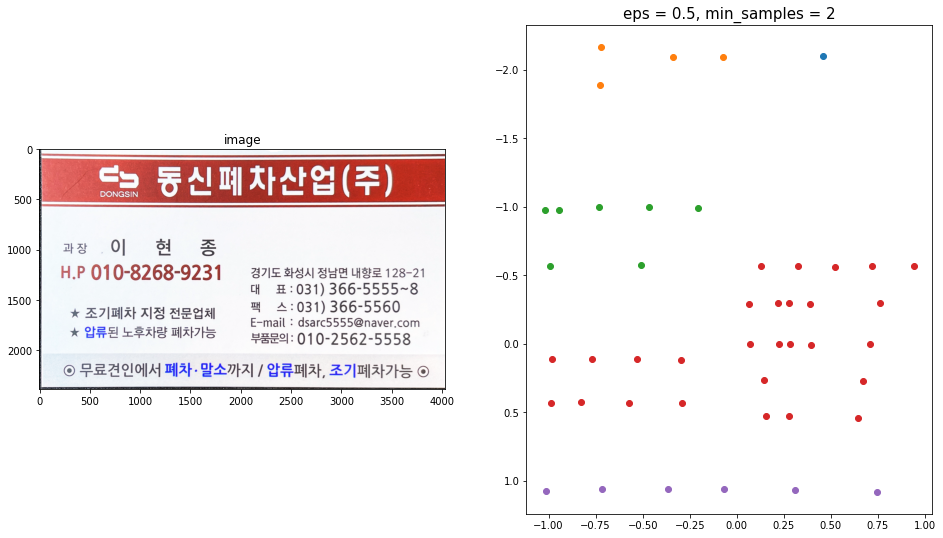

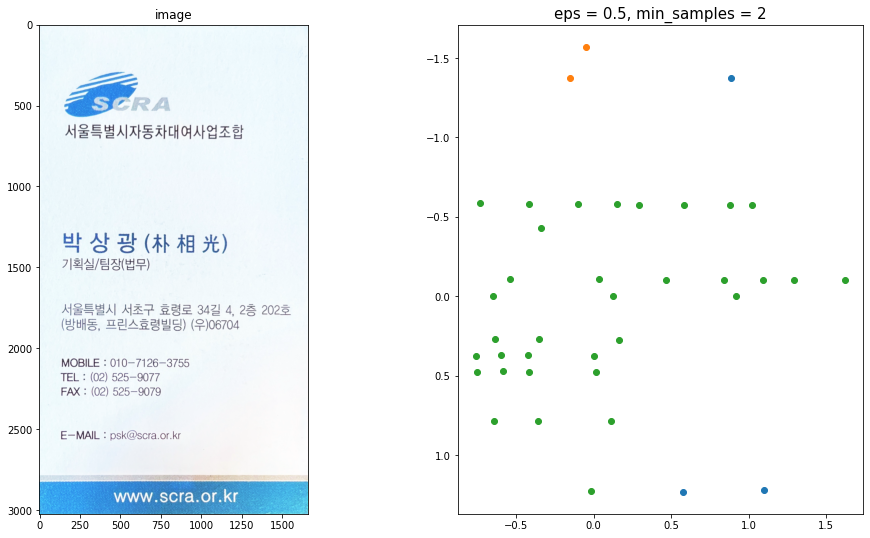

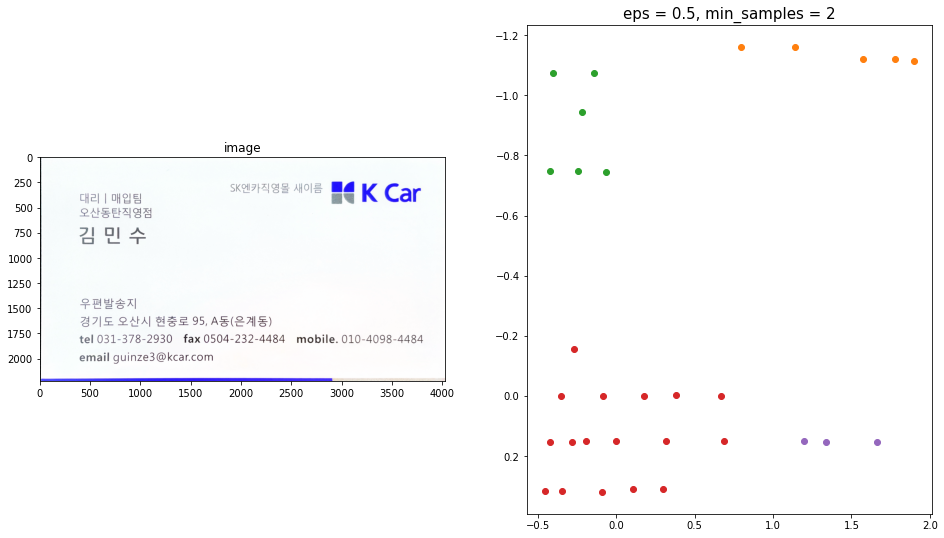

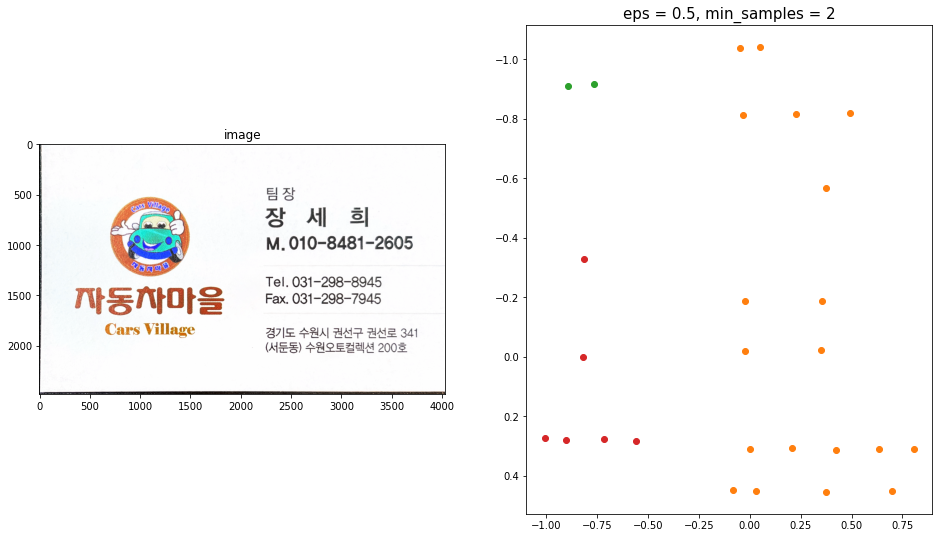

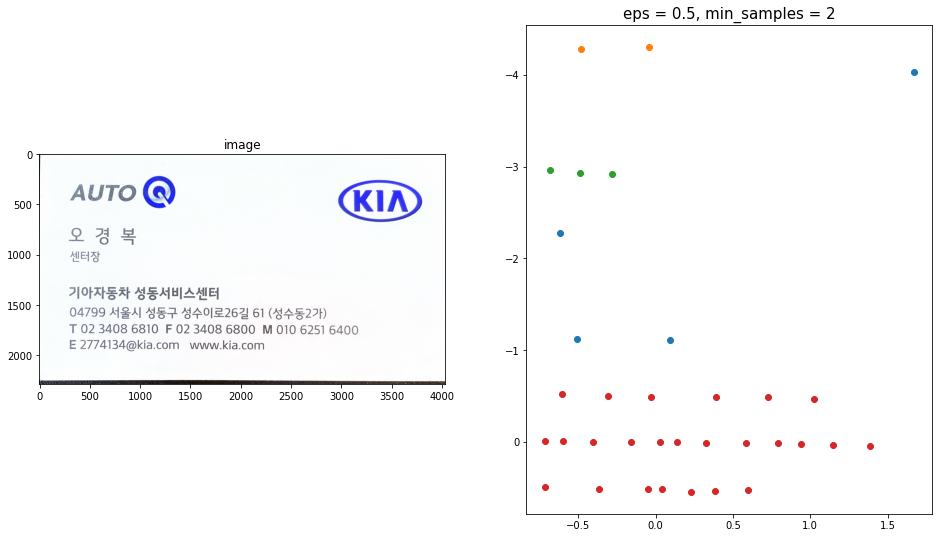

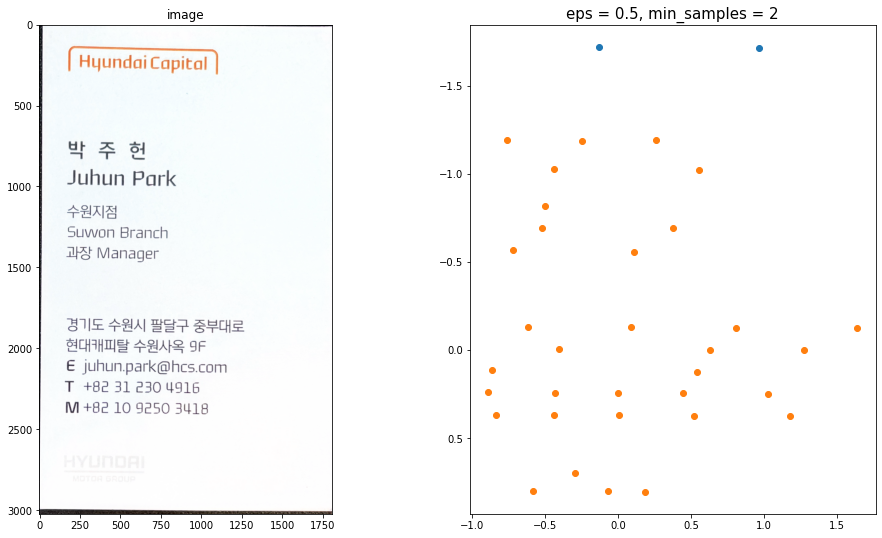

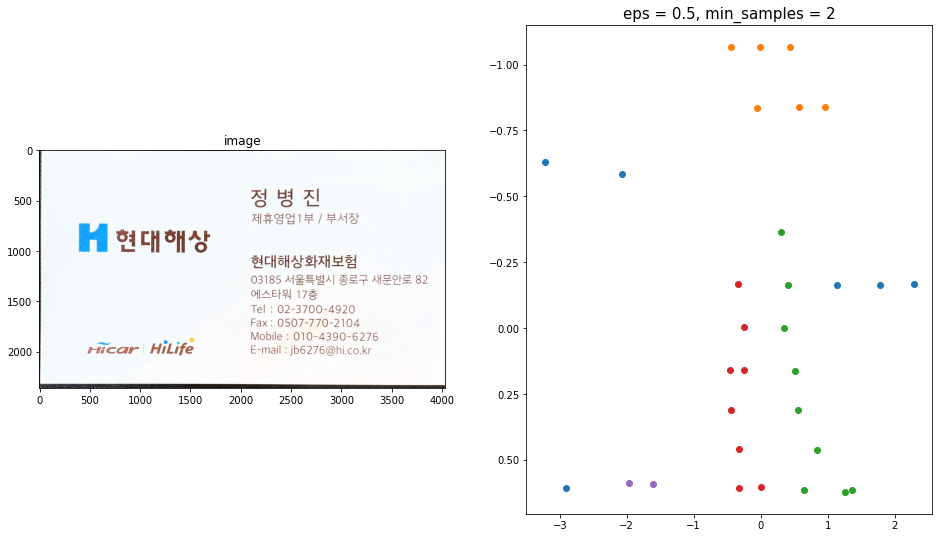

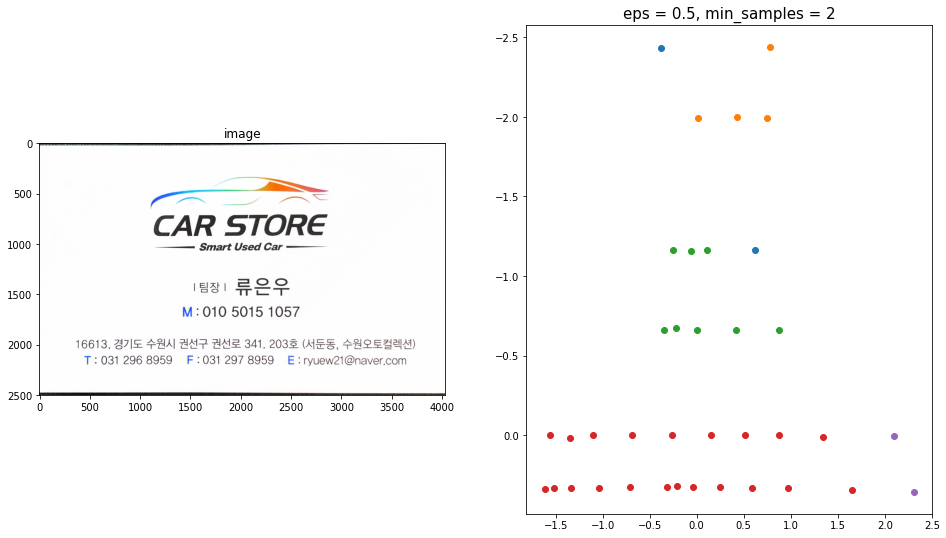

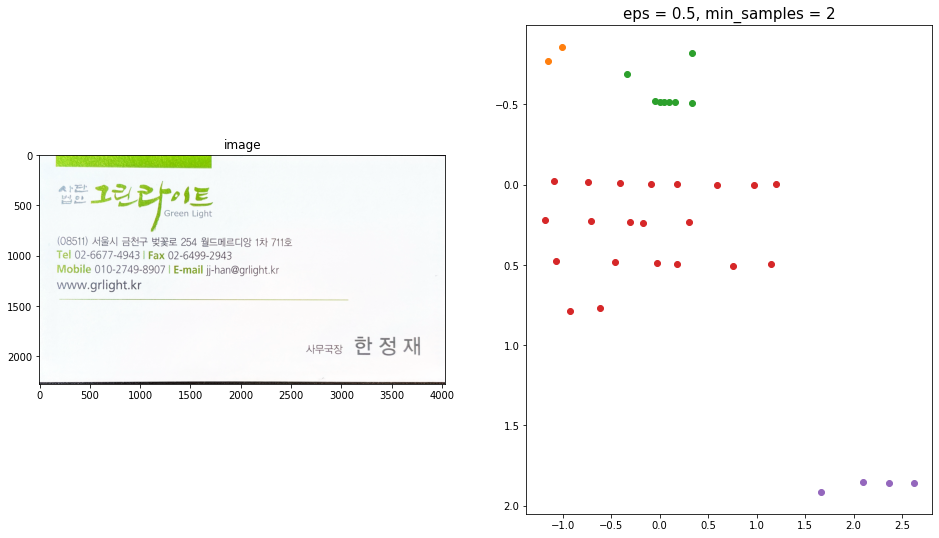

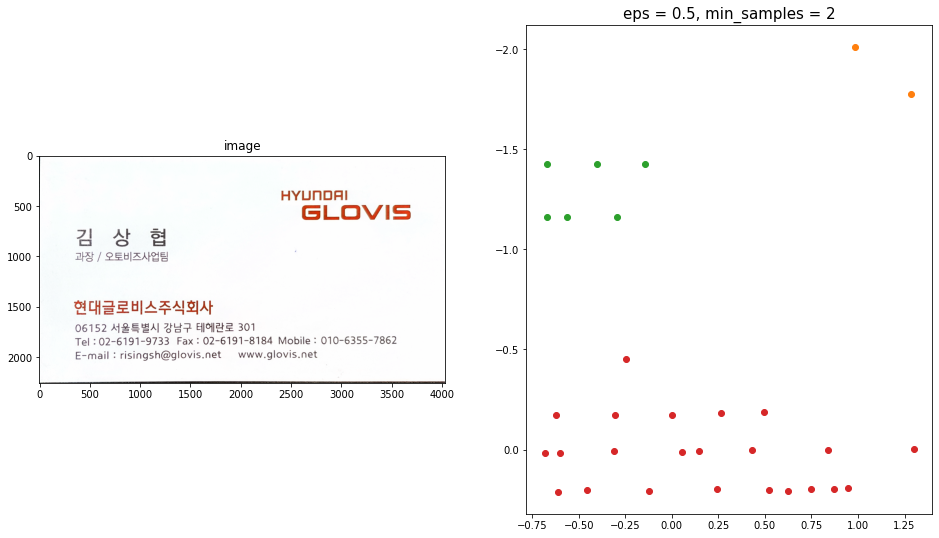

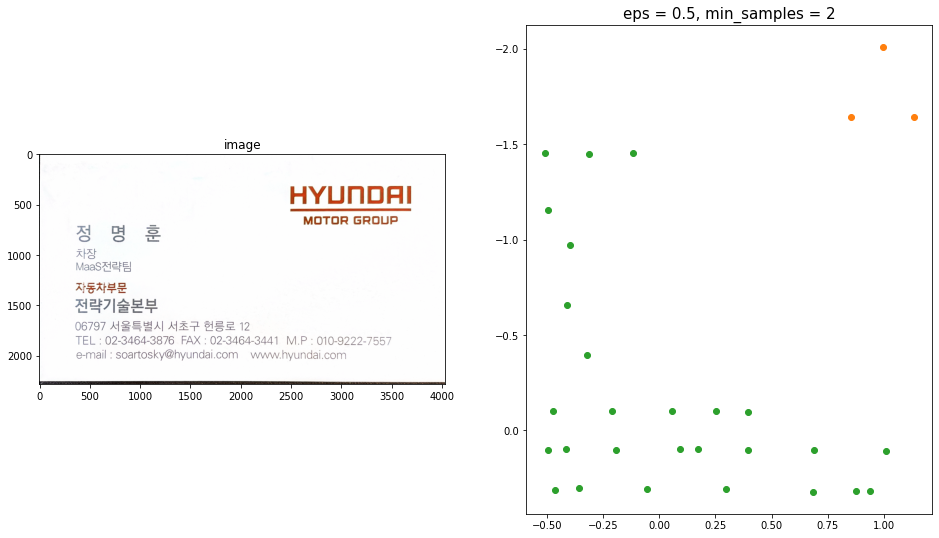

In [206]:
import pandas as pd
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import cv2

# minmax는 eps = 0.3

for i in range(1, 16) : 
    
    file_path = f"/opt/ml/final/test_image/test_image_vflat/vflat_image_{i}.jpg"
    test_image = OCR_api(file_path)
    temp_point = []
    
    x_point_1, x_point_2, x_point_3, x_point_4 = [], [], [], []
    y_point_1, y_point_2, y_point_3, y_point_4 = [], [], [], []
    x_medium, y_medium = [], []
    
    # OCR output에서 좌표만 불러온다.
    for i in range(len(test_image['ocr']['word'])) : 
        x_point_1.append(test_image['ocr']['word'][i]['points'][0][0])
        x_point_2.append(test_image['ocr']['word'][i]['points'][1][0])
        x_point_3.append(test_image['ocr']['word'][i]['points'][2][0])
        x_point_4.append(test_image['ocr']['word'][i]['points'][3][0])
        y_point_1.append(test_image['ocr']['word'][i]['points'][0][1])
        y_point_2.append(test_image['ocr']['word'][i]['points'][1][1])
        y_point_3.append(test_image['ocr']['word'][i]['points'][2][1])
        y_point_4.append(test_image['ocr']['word'][i]['points'][3][1])
        
        x_medium.append((test_image['ocr']['word'][i]['points'][0][0] + 
                         test_image['ocr']['word'][i]['points'][1][0] + 
                         test_image['ocr']['word'][i]['points'][2][0] + 
                         test_image['ocr']['word'][i]['points'][3][0]) / 4)
        y_medium.append((test_image['ocr']['word'][i]['points'][0][1] + 
                         test_image['ocr']['word'][i]['points'][1][1] + 
                         test_image['ocr']['word'][i]['points'][2][1] + 
                         test_image['ocr']['word'][i]['points'][3][1]) / 4)
    
    # df = pd.DataFrame({"x_point_1" : x_point_1,
    #                    "y_point_1" : y_point_1,
    #                    "x_point_2" : x_point_2,
    #                    "y_point_2" : y_point_2,
    #                    "x_point_3" : x_point_3,
    #                    "y_point_3" : y_point_3,
    #                    "x_point_4" : x_point_4,
    #                    "y_point_4" : y_point_4,
    #                    "target" : 0})
    
    df = pd.DataFrame({"x_medium" : x_medium,
                       "y_medium" : y_medium,
                       "target" : 0})
    
    # 정규화 진행
    scaler = RobustScaler()
    df_scale = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    
    # DBSCAN Hyperparameter setting
    dbscan_eps = 0.5
    dbscan_min_samples = 2

    # epsilon, 최소 샘플 개수 설정
    model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)

    # 군집화 모델 학습 및 클러스터 예측 결과 반환
    model.fit(df)
    df_scale['cluster'] = model.fit_predict(df_scale)

    img = cv2.imread(file_path)
    
    plt.figure(figsize = (16,9))
    plt.subplot(121),plt.imshow(img),plt.title('image')
    
    # # 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
    # for i in range(-1, df_scale['cluster'].max() + 1):
    #     plt.subplot(122),plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'x_point_2'], 
    #                                  df_scale.loc[df_scale['cluster'] == i, 'y_point_2'], 
    #                                  label = 'cluster ' + str(i))
    
    # 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
    for i in range(-1, df_scale['cluster'].max() + 1):
        plt.subplot(122),plt.scatter(df_scale.loc[df_scale['cluster'] == i, 'x_medium'], 
                                     df_scale.loc[df_scale['cluster'] == i, 'y_medium'], 
                                     label = 'cluster ' + str(i))

    plt.subplot(122),plt.gca().invert_yaxis()
    
    
    plt.title(f'eps = {dbscan_eps}, min_samples = {dbscan_min_samples}', size = 15)
    
    plt.show()

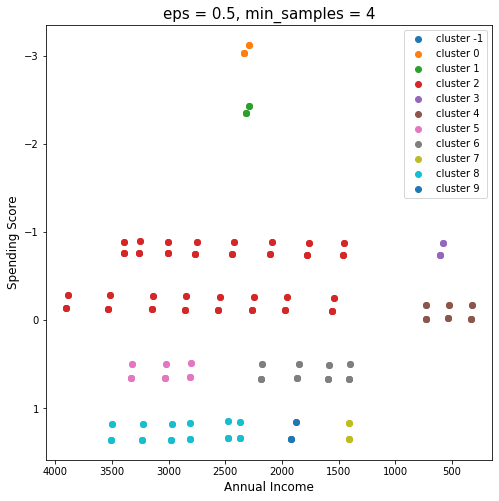

In [157]:
from sklearn.cluster import DBSCAN

dbscan_eps = 0.5
dbscan_min_samples = 4

# epsilon, 최소 샘플 개수 설정
model = DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples)

# 군집화 모델 학습 및 클러스터 예측 결과 반환
model.fit(df)
df_scale['cluster'] = model.fit_predict(df_scale)

import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

# 이상치 번호는 -1, 클러스터 최대 숫자까지 iteration
for i in range(-1, df_scale['cluster'].max() + 1):
    plt.scatter(df.loc[df_scale['cluster'] == i, 'x_point_1'], df_scale.loc[df_scale['cluster'] == i, 'y_point_1'], 
                    label = 'cluster ' + str(i))

plt.legend()
plt.title(f'eps = {dbscan_eps}, min_samples = {dbscan_min_samples}', size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()